In [1]:
from matplotlib import pyplot as plt
import numpy as np


# sampling algorithms



## use uniform random walks to have gaussian distribution 


**uniform random walk** means that a point, started at the origin on $\R$, at each time step, moves the $X$, which is a random variable uniformly distributed in ${[-1,1]}$. This is going to be used to sample the **Gaussian distribution** ${N(\mu, \sigma^2)}$ with the probability density function as ${f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp(-(x-\mu)^2/2\sigma^2)}$. 

There are 2 ways this sampling can be done

### the central limit way

Central limit theorem tells that for ${N}$ sufficiently large, and for ${X_i, i = 1,\cdots,N}$ i.i.d. uniformly distributed random variables on the interval ${[-1,1]}$,  we have 

$$ 
\sqrt{\frac{3}{N}} \sum_i X_i \sim \mathcal{N}(0,1)
$$ 

This is the central limit way of sampling gaussian distribution

In [2]:
def gaussian1(mu=0, sigma=1,N=100):
    sample = np.sqrt(3/N)*(np.sum([np.random.uniform(-1,1) for i in range(N)]))
    if sigma == 1 and mu == 0:
        return sample
    return (sample + mu) * np.sqrt(sigma) 

#### plot of the sampling

In [3]:
my_samples = [gaussian1() for i in range(10000)]
np_samples = [np.random.standard_normal() for i in range(10000)]

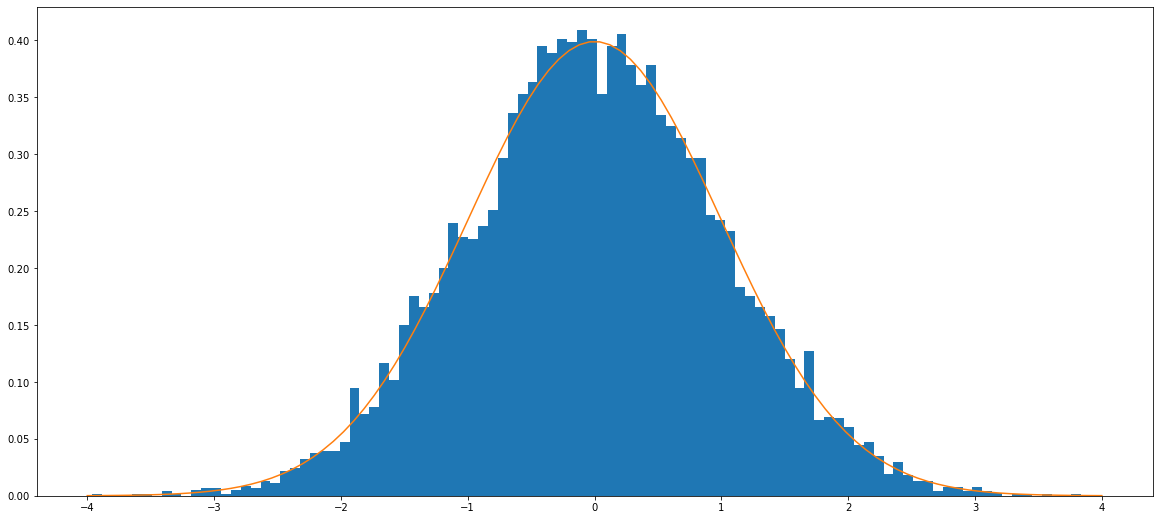

In [22]:
plt.figure(figsize=[20,9])
plt.hist(my_samples,bins=100,density=True)

X = np.linspace(-4,4,100)
Y = np.exp(-np.square(X)/2)/np.sqrt(2*np.pi)
plt.plot(X,Y)

print()

The results of mine compare to the results of NumPy's algorithm looks pretty similar, so this is good

### the box-muller way

this method samples 2 gaussian at the same time. It proceeds as the following: 

Sampling the pdf ${f(r) = r \exp(-r^2/2), r \ge 0 }$ by making the observation that this distribution is same as ${r = \sqrt{-2\log(1-\xi)}}$, where ${\xi}$ is uniform r.v. for interval ${[0,1]}$

Sampling the ${\theta = 2\pi \xi}$

And then combined we will have two gaussian ${y_1 = r \cos \theta, y_2 = r \sin \theta}$

In [5]:
def gaussian2(mu=0,sigma=1,number=2):
    '''This returns a list of `number` samples'''
    
    if mu !=0 or sigma!= 1:
        assert('not implemented for non-standard normal distribution')
        
    if number <= 2:
        r = np.sqrt(-2*np.log(1-np.random.uniform(0,1)))
        theta = np.random.uniform(0, 2*np.pi)
        y1 = r*np.cos(theta)
        y2 = r*np.sin(theta)
        
        if number == 1:
            return [y1]
        else:
            return [y1,y2]
    
    a = number//2
    b = number - a
    A = gaussian2(number=a)
    A.extend(gaussian2(number=b))
    return A

In [16]:
my_samples = gaussian2(number=10000)

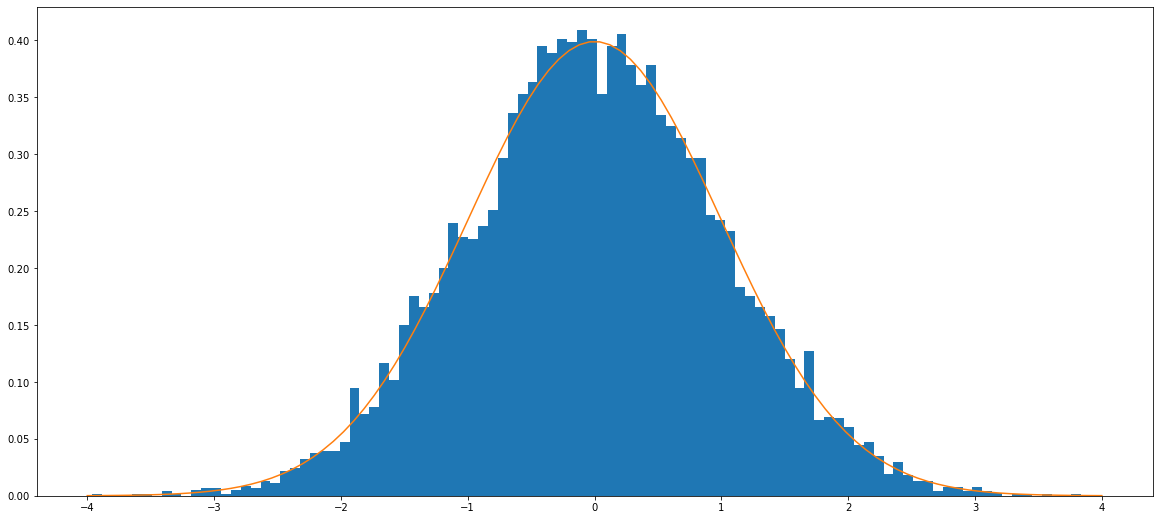

In [20]:
plt.figure(figsize=[20,9])
plt.hist(my_samples,bins=100,density=True)

X = np.linspace(-4,4,100)
Y = np.exp(-np.square(X)/2)/np.sqrt(2*np.pi)
plt.plot(X,Y)

print()

This looks good enough to me. And it is much faster than the old way. 

# Other exercises

the exercises are to use the following given r.v. 

- uniform random walk
- gaussian random walk

to generate distributions with the PDF 
- ${\frac12 \exp(-|x|), \quad c \exp(-x^4), \quad f(x,y) = d\exp(-x^2 + c(y-x^2)^2)}$, where ${c,d}$ are appropriate constants. 



## Sampling $f(x) = \frac12 \exp(-|x|)$

The cumulative is ${F(x) = \int_{-\infty}^x f(t) dt = \frac12 (1 + \int_0^x \exp(-|t|)dt) = \frac12(1 - \text{sgn}(x) \int_0^{|t|} d\exp(-t)) = \frac12(1 + \text{sgn}(x)(1-\exp(-|x|)))}$. 

Therefore with ${\xi}$ uniformly over ${[0,1]}$, I can generate ${x}$ by: 
- if ${\xi< \frac12}$, ${x = \log 2 \xi}$
- if ${\xi > \frac12}$, ${x = - \log 2(1-\xi)}$



In [9]:
def exercise1():
    xi = np.random.uniform(0,1)
    if xi < .5:
        return np.log(2*xi)
    return -np.log(2*(1-xi))

In [14]:
my_samples = [exercise1() for i in range(10000)]
X = np.linspace(-8,8,100)
Y = np.exp(-np.abs(X))

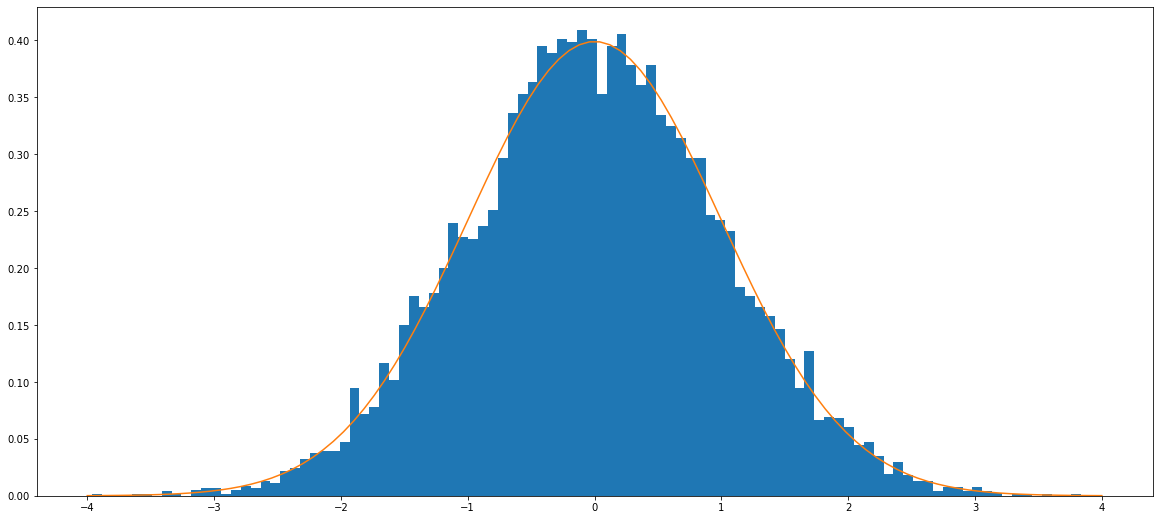

In [21]:
plt.figure(figsize=(20,9))
plt.hist(my_samples,bins=100,density=True)
plt.plot(X,Y)

## ${f(x) = c \exp(-x^4)}$

this is a non-trivial sampling task